In [1]:
# Assignment - A4  |  Name : Pratik Pingale  |  Roll No : 19CO056

# Boston Housing with Linear Regression

**With this data our objective is create a model using linear regression to predict the houses price**

The data contains the following columns:

* **CRIM**:  per capita crime rate by town.
* **ZN**:    proportion of residential land zoned for lots over 25,000 sq.ft.
* **INDUS**: proportion of non-retail business acres per town.
* **CHAS**:  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
* **NOX**:   nitrogen oxides concentration (parts per 10 million).
* **RM**:    average number of rooms per dwelling.
* **AGE**:   proportion of owner-occupied units built prior to 1940.
* **DIS**:   weighted mean of distances to five Boston employment centres.
* **RAD**:   index of accessibility to radial highways.
* **TAX**:   full-value property-TAX rate per $10,000.
* **PTRATIO**:pupil-teacher ratio by town
* **BLACK**:  1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
* **LSTAT**:  lower status of the population (percent).
* **MEDV**:   median value of owner-occupied homes in $$1000s

**Prepare our enviroment**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
# Importing DataSet and take a look at Data
Boston = pd.read_csv("boston.csv")
Boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [4]:
Boston.info()
Boston.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  BLACK    506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,BLACK,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


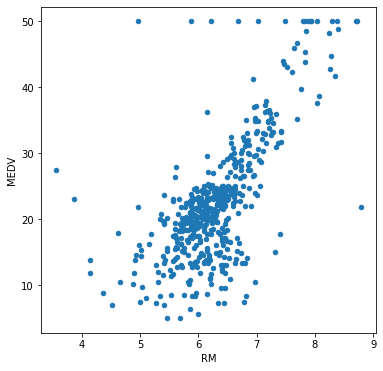

In [5]:
Boston.plot.scatter('RM', 'MEDV', figsize=(6, 6));

In this plot its clearly to see a linear pattern. Wheter more average number of rooms per dwelling, more expensive the median value is.

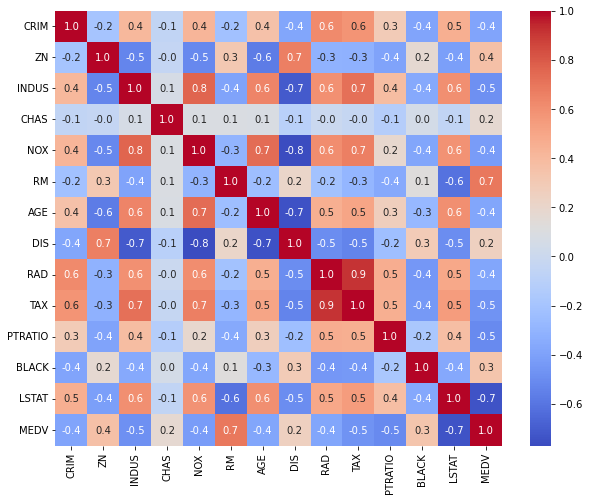

In [6]:
plt.subplots(figsize=(10,8))
sns.heatmap(Boston.corr(), cmap = 'coolwarm', annot = True, fmt = '.1f');

At this heatmap plot, we can do our analysis better than the pairplot.

Lets focus at the last line, where y = MEDV:

When shades of Blue: the more Blue color is on X axis, smaller the MEDV. Negative correlation                           
When light colors: those variables at axis x and y, they dont have any relation. Zero correlation                               
When shades of Red : the more Red color is on X axis, higher the MEDV. Positive correlation

# Trainning Linear Regression Model
**Define X and Y**

X: Varibles named as predictors, independent variables, features.                                                               
Y: Variable named as response or dependent variable

In [7]:
X = Boston[Boston.columns[:-1]]
Y = Boston['MEDV']

**Import sklearn librarys:**    
train_test_split, to split our data in two DF, one for build a model and other to validate.                                     
LinearRegression, to apply the linear regression.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [9]:
# Split DataSet
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
sc_X = StandardScaler()
X_train_ = sc_X.fit_transform(X_train)
X_test_ = sc_X.transform(X_test)

In [10]:
print(f'Train Dataset Size - X: {X_train.shape}, Y: {Y_train.shape}')
print(f'Test  Dataset Size - X: {X_test.shape}, Y: {Y_test.shape}')

Train Dataset Size - X: (354, 13), Y: (354,)
Test  Dataset Size - X: (152, 13), Y: (152,)


In [11]:
# Model Building
lm = LinearRegression()
lm.fit(X_train_, Y_train)
predictions = lm.predict(X_test_)

LinearRegression()

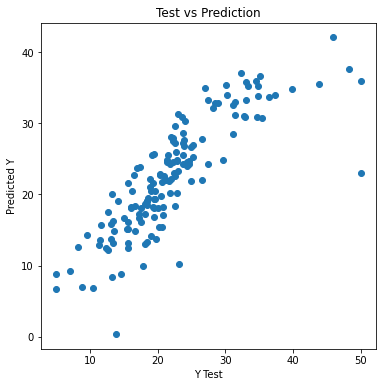

In [12]:
# Model Visualization
plt.figure(figsize=(6, 6));
plt.scatter(Y_test, predictions);
plt.xlabel('Y Test');
plt.ylabel('Predicted Y');
plt.title('Test vs Prediction');

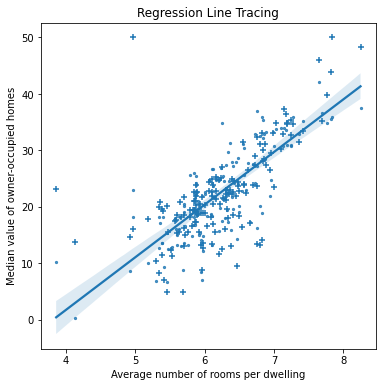

In [13]:
plt.figure(figsize=(6, 6));
sns.regplot(x = X_test['RM'], y = predictions, scatter_kws={'s':5});
plt.scatter(X_test['RM'], Y_test, marker = '+');
plt.xlabel('Average number of rooms per dwelling');
plt.ylabel('Median value of owner-occupied homes');
plt.title('Regression Line Tracing');

In [14]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, predictions))
print('Mean Square Error:', metrics.mean_squared_error(Y_test, predictions))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(Y_test, predictions)))

Mean Absolute Error: 3.2415796876194154
Mean Square Error: 21.19901430001093
Root Mean Square Error: 4.604238731865554


In [15]:
# Model Coefficients
coefficients = pd.DataFrame(lm.coef_.round(2), X.columns)
coefficients.columns = ['Coefficients']
coefficients

,Coefficients
CRIM,-0.74
ZN,0.91
INDUS,0.45
CHAS,0.89
NOX,-2.43
RM,2.89
AGE,0.07
DIS,-3.01
RAD,2.35
TAX,-1.76


How to interpret those coefficients:
    they are in function of MEDV, so 
    
    for one unit that NOX increase, the house value decrease 'NOX'*1000 (Negative correlation) money unit.
    for one unit that RM increase, the house value increase 'RM'*1000 (Positive correlation) money unit.

*1000 because the MEDV is in 1000
and this apply to the other variables/coefficients.
    